In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from folium.plugins import HeatMap

In [2]:
accident = pd.read_csv('../data/Traffic_Accident.csv')

C:\Users\amerk\AppData\Local\Temp\ipykernel_15712\3083059037.py:1: DtypeWarning: Columns (2,3,4,14,15,20,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  accident = pd.read_csv('../data/Traffic_Accident.csv')


In [3]:
#!pip install pandas


In [4]:
# dropping the columns of x and y which we do not need 
accident.drop(columns=["x", "y"], inplace=True)

In [5]:
accident.head(5)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Weather Description,Illumination Description,...,Long,HarmfulCodes,HarmfulDescriptions,ObjectId,Zip Code,RPA,Weather,IlluACCIDEmination,Collision Type,Reporting Officer
0,20170018222,1/7/2017 3:10,2,1,0,N,N,ANGLE,CLEAR,DARK - LIGHTED,...,-86.75166,12,MOTOR VEHICLE IN TRANSPORT,1,37210,8101,21,3,4,240943
1,20170018236,1/7/2017 3:00,1,0,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,SNOW,DARK - LIGHTED,...,-86.74199,24,GUARDRAIL FACE,2,37115,2041,4,3,0,209189
2,20170018257,1/7/2017 2:35,2,0,0,N,Y,ANGLE,SNOW,DARK - LIGHTED,...,-86.71342,14;55,PARKED MOTOR VEHICLE;Motor Vehicle-In-Motion O...,3,37115,1507,4,3,4,405411
3,20170018294,1/7/2017 3:28,1,0,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DARK - LIGHTED,...,-86.76087,34,DITCH,4,37210,8008,21,3,0,240971
4,20170018301,1/7/2017 3:40,1,1,0,N,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLOUDY,DARK - LIGHTED,...,-86.74988,36;63,CONCRETE TRAFFIC BARRIER;Ran Off Road-Right,5,37115,20044,22,3,0,909489


In [6]:
(accident.isnull().sum())

Accident Number               0
Date and Time                 0
Number of Motor Vehicles      0
Number of Injuries            0
Number of Fatalities          0
Property Damage               0
Hit and Run                   0
Collision Type Description    0
Weather Description           0
Illumination Description      0
Street Address                0
City                          0
State                         0
Precinct                      0
Lat                           0
Long                          0
HarmfulCodes                  0
HarmfulDescriptions           0
ObjectId                      0
Zip Code                      0
RPA                           0
Weather                       0
IlluACCIDEmination            0
Collision Type                0
Reporting Officer             0
dtype: int64

In [7]:
accident.dtypes

Accident Number                int64
Date and Time                 object
Number of Motor Vehicles      object
Number of Injuries            object
Number of Fatalities          object
Property Damage               object
Hit and Run                   object
Collision Type Description    object
Weather Description           object
Illumination Description      object
Street Address                object
City                          object
State                         object
Precinct                      object
Lat                           object
Long                          object
HarmfulCodes                  object
HarmfulDescriptions           object
ObjectId                       int64
Zip Code                       int64
RPA                           object
Weather                       object
IlluACCIDEmination            object
Collision Type                object
Reporting Officer             object
dtype: object

In [8]:
#goupped the dataset in order to find the 24 hour difference in accidents 
day_conditions = ['DAYLIGHT', 'DAWN', 'DUSK']
night_conditions = ['DARK - LIGHTED', 'DARK - NOT LIGHTED', 'Dark-Unknown Lighting']
accident['Day/Night'] = accident['Illumination Description'].apply(
    lambda x: 'Day' if x in day_conditions else ('Night' if x in night_conditions else 'Not Reported')
)


accident_counts = accident['Day/Night'].value_counts()

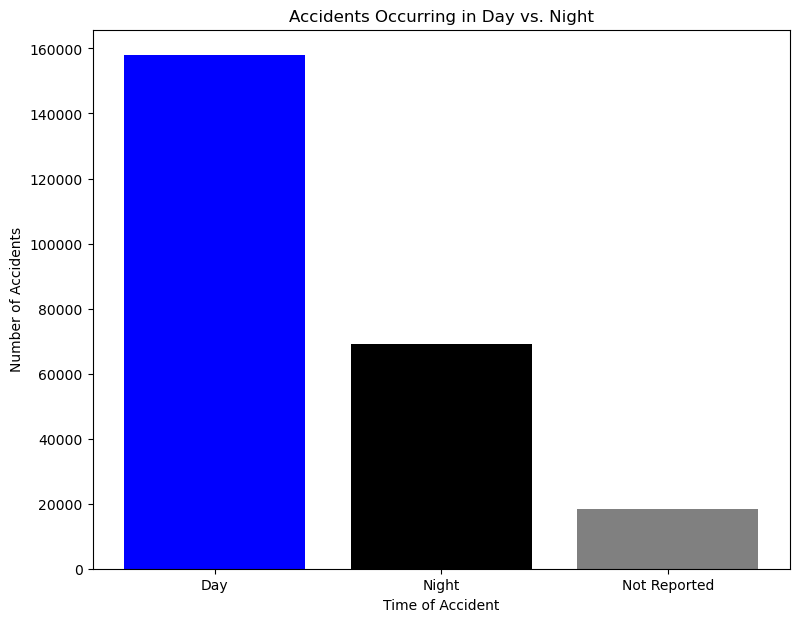

In [9]:
plt.figure(figsize=(9, 7))
plt.bar(accident_counts.index, accident_counts.values, color=['blue', 'black', 'gray'])
plt.xlabel("Time of Accident")
plt.ylabel("Number of Accidents")
plt.title("Accidents Occurring in Day vs. Night")
plt.show()

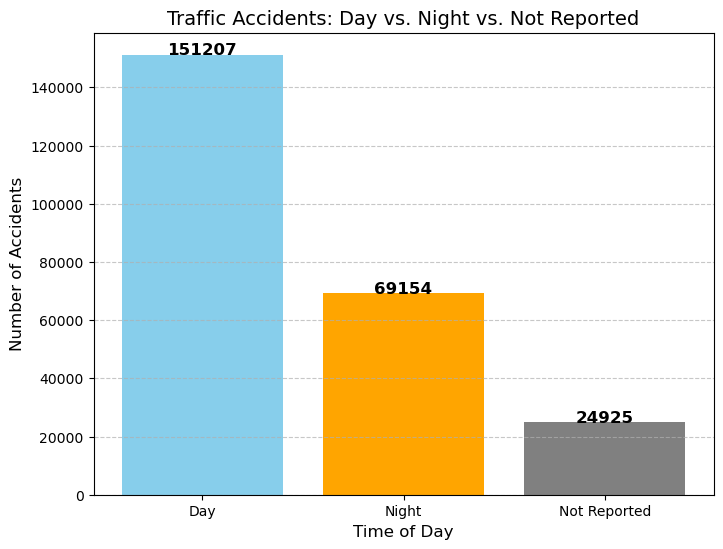

In [10]:



accident['Time of Day'] = accident['Illumination Description'].apply(
    lambda x: 'Day' if 'DAYLIGHT' in str(x).upper() else ('Night' if 'DARK' in str(x).upper() else 'Not Reported')
)


accident_counts = accident['Time of Day'].value_counts()


plt.figure(figsize=(8, 6))
bars = plt.bar(accident_counts.index, accident_counts.values, color=['skyblue', 'orange', 'gray'])


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(bar.get_height()), ha='center', fontsize=12, fontweight='bold')

plt.title('Traffic Accidents: Day vs. Night vs. Not Reported', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


In [11]:
accident_counts

Time of Day
Day             151207
Night            69154
Not Reported     24925
Name: count, dtype: int64

In [13]:
accident["Number of Injuries"] = accident["Number of Fatalities"].astype(str)  # Convert to string

df_grouped = accident.groupby('Zip Code')[['Number of Injuries', 'Number of Fatalities']].sum()


df_sorted = df_grouped.sort_values(by=['Number of Injuries', 'Number of Fatalities'], ascending=False)


top_5_zipcodes = df_sorted.head(5)

TypeError: can only concatenate str (not "int") to str

In [ ]:
top_5_zipcodes


df_grouped = accident.groupby('Zip Code')[['Number of Injuries', 'Number of Fatalities']].sum()


df_sorted = df_grouped.sort_values(by=['Number of Injuries', 'Number of Fatalities'], ascending=False)


top_5_zipcodes = df_sorted.head(5)


top_zip_codes = top_5_zipcodes.index.astype(str)
df_top = accident[accident['Zip Code'].astype(str).isin(top_zip_codes)]

zip_locations = df_top.groupby('Zip Code')[['Lat', 'Long']].median()
map_center = [zip_locations['Lat'].mean(), zip_locations['Long'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)


df_top_unique = df_top[['Lat', 'Long']].drop_duplicates()


for _, row in df_top_unique.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=3,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6
    ).add_to(accident_map)
   

In [ ]:
#this is the map for whole nashville and serounding areas with is heavy to be loaded for injuries and fatalities.
#accident_map

In [ ]:
accident.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)

df_grouped = accident.groupby('Zip Code')[['Number of Injuries', 'Number of Fatalities']].sum()

df_sorted = df_grouped.sort_values(by=['Number of Injuries', 'Number of Fatalities'], ascending=False)


top_5_zipcodes = df_sorted.head(5)


top_zip_codes = top_5_zipcodes.index.astype(str)
df_top = accident[accident['Zip Code'].astype(str).isin(top_zip_codes)]

zip_locations = df_top.groupby('Zip Code')[['Latitude', 'Longitude']].median()
map_center = [zip_locations['Latitude'].mean(), zip_locations['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)


df_top_sampled = df_top[['Latitude', 'Longitude', 'Number of Injuries', 'Number of Fatalities']].drop_duplicates().sample(n=1000, random_state=42)


for _, row in df_top_sampled.iterrows():
    if row['Number of Fatalities'] > 0:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color="red", icon="info-sign"),
            popup=f"Fatalities: {row['Number of Fatalities']}",
            tooltip="Fatality"
        ).add_to(accident_map)
    elif row['Number of Injuries'] > 0:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color="blue", icon="info-sign"),
            popup=f"Injuries: {row['Number of Injuries']}",
            tooltip="Injury"
        ).add_to(accident_map)

In [ ]:
accident_map

In [ ]:

accident.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)


accident['Date and Time'] = pd.to_datetime(accident['Date and Time']).dt.date  # Extract only the date

df_grouped = accident.groupby('Zip Code')[['Number of Injuries', 'Number of Fatalities']].sum()


df_sorted = df_grouped.sort_values(by=['Number of Injuries', 'Number of Fatalities'], ascending=False)


top_5_zipcodes = df_sorted.head(5)


top_zip_codes = top_5_zipcodes.index.astype(str)
df_top = accident[accident['Zip Code'].astype(str).isin(top_zip_codes)]


zip_locations = df_top.groupby('Zip Code')[['Latitude', 'Longitude']].median()
map_center = [zip_locations['Latitude'].mean(), zip_locations['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)


df_top_sampled = df_top[['Latitude', 'Longitude', 'Number of Injuries', 'Number of Fatalities', 'Date and Time']].drop_duplicates().sample(n=2000, random_state=42)


for _, row in df_top_sampled.iterrows():
    accident_date = row['Date and Time']  # Extract accident date
    
    if row['Number of Fatalities'] > 0:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color="black", icon="info-sign"),
            popup=f"Date: {accident_date}<br>Fatalities: {row['Number of Fatalities']}",
            tooltip="Fatality"
        ).add_to(accident_map)
    elif row['Number of Injuries'] > 0:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color="blue", icon="info-sign"),
            popup=f"Date: {accident_date}<br>Injuries: {row['Number of Injuries']}",
            tooltip="Injury"
        ).add_to(accident_map)


In [ ]:
accident_map

#monthly report in covid and post and pre covid
accident['Date and Time'] = pd.to_datetime(accident['Date and Time'], errors='coerce')
accident['Year'] = accident['Date and Time'].dt.year
accident['Month'] = accident['Date and Time'].dt.month

accident['Year-Month'] = accident['Date and Time'].dt.to_period('M')
monthly_trends = accident.groupby('Year-Month').size()


plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_trends.index.astype(str), y=monthly_trends.values, marker='o', linewidth=1.8, label="Total Accidents")


plt.axvspan("2020-01", "2022-12", color='red', alpha=0.2, label="COVID-19 Period")

# Customize aesthetics
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Monthly Traffic Accident Trends: Pre-COVID vs. COVID vs. Post-COVID", fontsize=14, fontweight='bold')
plt.xticks(rotation=78, fontsize=9)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:

accident['Date and Time'] = pd.to_datetime(accident['Date and Time'], errors='coerce')


accident['Year'] = accident['Date and Time'].dt.year

accident_trends = accident.groupby('Year').size()

In [ ]:
#yearly traffic accident in covid and pre covid and post covid 


plt.figure(figsize=(12, 6))
sns.lineplot(x=accident_trends.index, y=accident_trends.values, marker='o', linewidth=2.5, label="Total Accidents")


plt.axvspan(2020, 2022, color='red', alpha=0.2, label='COVID-19 Period')


plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Yearly Traffic Accident Trends: Pre-COVID vs. COVID vs. Post-COVID", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
weather_accident_trends = accident['Weather Description'].value_counts().reset_index()
weather_accident_trends.columns = ['Weather Condition', 'Accident Count']

In [ ]:




plt.figure(figsize=(12, 6))
bars = plt.bar(weather_accident_trends['Weather Condition'][:10], weather_accident_trends['Accident Count'][:10])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Traffic Accidents by Weather Condition (Top 10)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#hit and run that caused injury or fatality and property damage 
hit_and_run_df = accident[accident['Hit and Run'] == 'Y']


hit_and_run_df['Year'] = pd.to_datetime(hit_and_run_df['Date and Time'], errors='coerce').dt.year


hit_and_run_trends = hit_and_run_df.groupby('Year').agg({
    'Number of Injuries': 'sum',
    'Number of Fatalities': 'sum',
    'Property Damage': 'count' 
}).reset_index()

plt.figure(figsize=(12, 6))

plt.style.use('ggplot')  


colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']
labels = ['Injuries', 'Fatalities', 'Property Damage Cases']
columns = ['Number of Injuries', 'Number of Fatalities', 'Property Damage']

for i, col in enumerate(columns):
    plt.plot(hit_and_run_trends['Year'], hit_and_run_trends[col], label=labels[i], marker=markers[i], color=colors[i], linestyle='-', linewidth=2, markersize=8, alpha=0.9)


    for j in range(len(hit_and_run_trends)):
        plt.text(hit_and_run_trends['Year'][j], hit_and_run_trends[col][j] + 1, 
                 str(hit_and_run_trends[col][j]), ha='center', fontsize=10, color=colors[i], fontweight='bold')


plt.gca().set_facecolor('#f7f7f7')  

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Hit and Run Incidents Trend (Injuries, Fatalities, Property Damage)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc='upper left', frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)


In [ ]:
accidents_by_collision = accident['Collision Type Description'].value_counts()

In [ ]:



plt.figure(figsize=(12, 6))
plt.bar(accidents_by_collision.index, accidents_by_collision.values, color='mediumseagreen', alpha=0.7)
plt.xlabel('Collision Type')
plt.ylabel('Number of Accidents')
plt.title('Traffic Accidents by Collision Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

In [ ]:
injuries_count = accident['Number of Injuries'].sum()
fatalities_count = accident['Number of Fatalities'].sum()


In [ ]:


plt.figure(figsize=(8, 8))
plt.pie(
    [injuries_count, fatalities_count], 
    labels=['Injuries', 'Fatalities'], 
    autopct='%1.1f%%', 
    colors=['orange', 'red'], 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Severity Analysis of Traffic Accidents')

plt.show()

In [ ]:

#showing here the top 10 cities that more accidents are happening 

top_cities = accident['City'].value_counts().head(10)


plt.figure(figsize=(10, 6))
bars = plt.barh(top_cities.index, top_cities.values, color=plt.cm.Paired.colors[:10])


for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), va='center', fontsize=12, fontweight='bold')

plt.title('Top 10 Cities with the Most Traffic Accidents', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
hit_and_run_counts = accident['Hit and Run'].value_counts()

In [ ]:



plt.figure(figsize=(8, 6))
plt.bar(hit_and_run_counts.index, hit_and_run_counts.values, color=['blue', 'red'], alpha=0.7)
plt.xlabel('Hit and Run')
plt.ylabel('Number of Accidents')
plt.title('Hit-and-Run vs. Non Hit-and-Run Accidents')
plt.xticks(ticks=[0, 1], labels=['Non Hit-and-Run', 'Hit-and-Run'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

In [ ]:
if 'Zip Code' in accident.columns:
    
    accidents_by_zip = accident.groupby('Zip Code').size().reset_index(name='Accident Count')

    
    top_15_zipcodes = accidents_by_zip.nlargest(15, 'Accident Count')


In [ ]:


    
    plt.figure(figsize=(12, 6))
    plt.bar(top_15_zipcodes['Zip Code'].astype(str), top_15_zipcodes['Accident Count'], color='teal', alpha=0.7)
    plt.xlabel('Zip Code')
    plt.ylabel('Number of Accidents')
    plt.title('Top 15 Zip Codes with the Most Traffic Accidents')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    plt.show()

# making the injuries and fatalities per day and month 

accident["Date and Time"] = pd.to_datetime(accident["Date and Time"], errors='coerce')


accident["Date"] = accident["Date and Time"].dt.date
accident["Month-Year"] = accident["Date and Time"].dt.to_period("M")


daily_stats = accident.groupby("Date")[["Number of Fatalities", "Number of Injuries"]].sum().reset_index()
daily_stats["Fatalities per Day"] = daily_stats["Number of Fatalities"]
daily_stats["Injuries per Day"] = daily_stats["Number of Injuries"]


monthly_stats = accident.groupby("Month-Year")[["Number of Fatalities", "Number of Injuries"]].sum().reset_index()
monthly_stats["Fatalities per Month"] = monthly_stats["Number of Fatalities"]
monthly_stats["Injuries per Month"] = monthly_stats["Number of Injuries"]



In [ ]:

accident["Date and Time"] = pd.to_datetime(accident["Date and Time"], errors='coerce')

accident["Date"] = accident["Date and Time"].dt.date
accident["Month-Year"] = accident["Date and Time"].dt.to_period("M")


daily_stats = accident.groupby("Date")[["Number of Fatalities", "Number of Injuries"]].sum().reset_index()
daily_stats["Fatalities per Day"] = daily_stats["Number of Fatalities"]
daily_stats["Injuries per Day"] = daily_stats["Number of Injuries"]

monthly_stats = accident.groupby("Month-Year")[["Number of Fatalities", "Number of Injuries"]].sum().reset_index()
monthly_stats["Fatalities per Month"] = monthly_stats["Number of Fatalities"]
monthly_stats["Injuries per Month"] = monthly_stats["Number of Injuries"]


accidents = accident.merge(daily_stats, on="Date", how="left")
accidents = accident.merge(monthly_stats, on="Month-Year", how="left")

In [ ]:
accidents.to_csv("Updated_Traffic_Accident.csv", index=False)

In [ ]:
tn_toxic_df = pd.read_csv("../data/tn_toxic.csv")

In [ ]:
accident["Zip Code"] = accident["Zip Code"].astype(str).str.split('.').str[0]
tn_toxic_df["Zip_code"] = tn_toxic_df["Zip_code"].astype(str)

In [ ]:
merged_df = pd.merge(
    accident, 
    tn_toxic_df, 
    left_on="Zip Code", 
    right_on="Zip_code", 
    how="inner"
)

In [ ]:
merged_df.head(1)

In [ ]:
county_summary = merged_df.groupby("county_name").agg({
    "Number of Injuries": "sum",
    "Number of Fatalities": "sum",
    "Accident Number": "count",  
    "Hit and Run": lambda x: (x == "Y").sum()
}).rename(columns={"Accident Number": "Total Accidents"})

In [ ]:
county_summary[["Number of Injuries", "Number of Fatalities"]].plot(
    kind="bar", figsize=(12, 6), title="Traffic Accidents by County"
)

plt.xlabel("County Name")
plt.ylabel("Total Count")
plt.xticks(rotation=90)
plt.show()